In [1]:
import datetime
def printbar():
    nowtime = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    print("\n"+"="*8 + "%s"%nowtime)

printbar()


========2024-05-31 14:42:42


In [2]:
import numpy as np   
noesypr_nmr_120 = np.load(r'ac_120plasma_noesypr.npy')
cpmgpr_nmr_120 = np.load(r'ac_120plasma_cpmgpr.npy')
ledbp_nmr_120 = np.load(r'ac_120plasma_ledbp.npy')

noesypr_nmr_120.shape, cpmgpr_nmr_120.shape, ledbp_nmr_120.shape

((120, 131072), (120, 58733), (120, 131072))

In [3]:
ppm_20 = np.linspace(14.8628, -5.1648, 128*1024)   
for i in range(0, 128*1024):
    if ppm_20[i] < 9.0:  
        print('{:.3f} ppm, {} point'.format(ppm_20[i], i))
        break
for i in range(0, 128*1024):
    if ppm_20[i] < 0.5: 
        print('{:.3f} ppm, {} point'.format(ppm_20[i], i))
        break      

9.000 ppm, 38370 point
0.500 ppm, 93998 point


In [4]:
ppm_9p03 = np.linspace(9.00653, 0.032167, 58733) 
for i in range(0, 58733):
    if ppm_9p03[i] < 9:
        print('{:.3f} ppm, {} point'.format(ppm_9p03[i], i))
        break   
for i in range(0, 58733):
    if ppm_9p03[i] < 0.5:
        print('{:.3f} ppm, {} point'.format(ppm_9p03[i], i))
        break   

9.000 ppm, 43 point
0.500 ppm, 55671 point


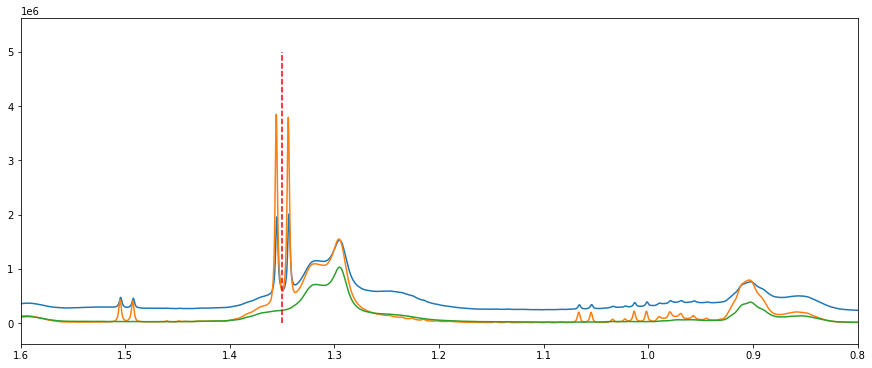

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
plt.plot(ppm_20, noesypr_nmr_120[0] )
plt.plot(ppm_9p03, cpmgpr_nmr_120[0] )  
plt.plot(ppm_20, ledbp_nmr_120[0] )
plt.vlines(1.35, 0, 5000000, colors='r', linestyles='--') # Lactate 1.35 ppm
plt.xlim(1.6, 0.8)
plt.show()   

In [6]:
for i in range(0, 58733):
    if ppm_9p03[43:55671][i] < 5.17:
        print('{:.3f} ppm, {} point'.format(ppm_9p03[i], i))
        break   
for i in range(0, 58733):
    if ppm_9p03[43:55671][i] < 4.50:
        print('{:.3f} ppm, {} point'.format(ppm_9p03[i], i))
        break  

5.177 ppm, 25065 point
4.507 ppm, 29450 point


In [7]:
noesypr_nmr_120 -= noesypr_nmr_120[:,80000:95000].min(1).reshape(-1,1)
noesypr_nmr_120 /= noesypr_nmr_120[:,80000:95000].max(1).reshape(-1,1)
ledbp_nmr_120 -= ledbp_nmr_120[:,80000:95000].min(1).reshape(-1,1)
ledbp_nmr_120 /= ledbp_nmr_120[:,80000:95000].max(1).reshape(-1,1)
cpmgpr_nmr_120 -= cpmgpr_nmr_120[:,30000: ].min(1).reshape(-1,1)
cpmgpr_nmr_120 /= cpmgpr_nmr_120[:,30000: ].max(1).reshape(-1,1)

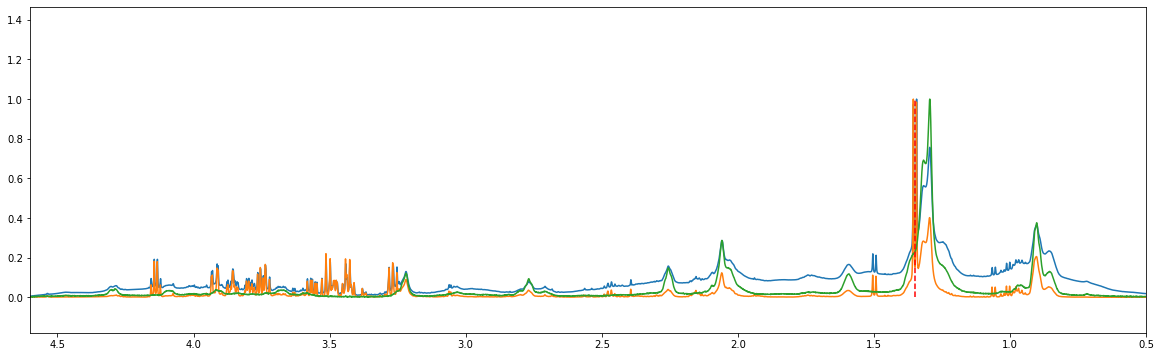

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))
plt.plot(ppm_20, noesypr_nmr_120[0] )
plt.plot(ppm_9p03, cpmgpr_nmr_120[0] )  
plt.plot(ppm_20, ledbp_nmr_120[0] )
plt.vlines(1.35, 0, 1, colors='r', linestyles='--') # Lactate 1.35 ppm
plt.xlim(4.6, 0.5)
plt.show()   

In [9]:
import numpy as np
ac_noesypr1d_120 = np.load(r'ac_120plasma_noesypr1d_data.npy')
ac_noesypr1d_small_120 = np.load(r'ac_120plasma_small_data.npy')
ac_noesypr1d_large_120 = np.load(r'ac_120plasma_large_data.npy')

ac_noesypr1d_120.shape, ac_noesypr1d_small_120.shape, ac_noesypr1d_large_120.shape

((120, 131072), (120, 131072), (120, 131072))

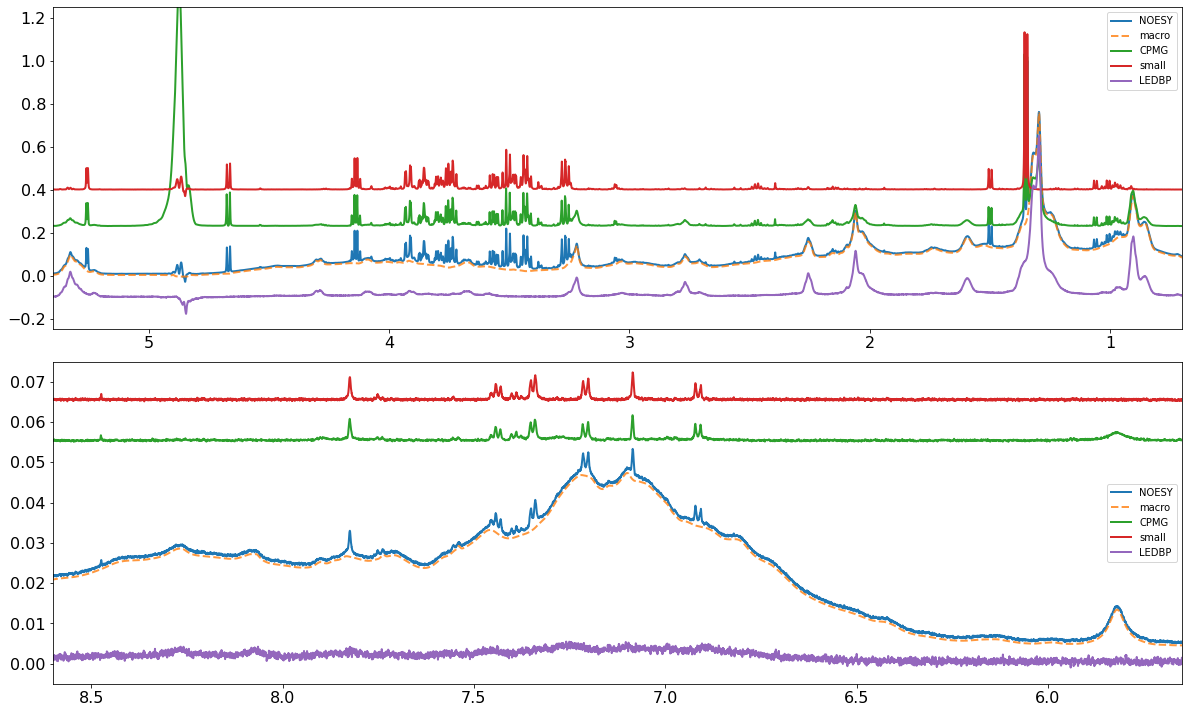

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 10))
plt.subplot(2,1,1)
plt.plot(ppm_20, ac_noesypr1d_120[0], linewidth = 2 , label = 'NOESY')
plt.plot(ppm_20, ac_noesypr1d_large_120[0]-0.005,linestyle='--' , alpha = 0.8, linewidth = 2, label = 'macro')
plt.plot(ppm_9p03, cpmgpr_nmr_120[0]*0.8+0.23, linewidth = 2 , label = 'CPMG')  
plt.plot(ppm_20, ac_noesypr1d_small_120[0]+0.4 , linewidth = 2, label = 'small')
plt.plot(ppm_20, ledbp_nmr_120[0]*0.75-0.1 , linewidth = 2, label = 'LEDBP')
plt.xlim(5.4, 0.7)
plt.ylim(-0.25,1.25) 
plt.legend()
plt.tick_params(labelsize=16)
plt.subplot(2,1,2)
plt.plot(ppm_20, ac_noesypr1d_120[0] , linewidth = 2, label = 'NOESY')
plt.plot(ppm_20, ac_noesypr1d_large_120[0]-0.0003, linestyle='--' , alpha = 0.8, linewidth = 2, label = 'macro')
plt.plot(ppm_9p03, cpmgpr_nmr_120[0]*0.8+0.055, linewidth = 2 , label = 'CPMG')  
plt.plot(ppm_20, ac_noesypr1d_small_120[0]+0.065 , linewidth = 2, label = 'small')
plt.plot(ppm_20, ledbp_nmr_120[0]*0.75 , linewidth = 2, label = 'LEDBP')  
plt.xlim(8.6, 5.65 )
plt.ylim(-0.005, 0.075) 
plt.legend()
plt.subplots_adjust(top=0.99,bottom=0.05,left=0.01 ,right=0.99,hspace=0.1,wspace=0.2)
plt.tick_params(labelsize=16)
plt.show()  

In [11]:
ac_noesypr1d_120 -= ac_noesypr1d_120[:,80000:95000].min(1).reshape(-1,1)
ac_noesypr1d_120 /= ac_noesypr1d_120[:,80000:95000].max(1).reshape(-1,1)
ac_noesypr1d_small_120 -= ac_noesypr1d_small_120[:,80000:95000].min(1).reshape(-1,1)
ac_noesypr1d_small_120 /= ac_noesypr1d_small_120[:,80000:95000].max(1).reshape(-1,1)
ac_noesypr1d_large_120 -= ac_noesypr1d_large_120[:,80000:95000].min(1).reshape(-1,1)
ac_noesypr1d_large_120 /= ac_noesypr1d_large_120[:,80000:95000].max(1).reshape(-1,1)

ac_noesypr1d_120.shape, ac_noesypr1d_small_120.shape, ac_noesypr1d_large_120.shape

((120, 131072), (120, 131072), (120, 131072))

In [12]:
# noesypr: 93998 - 38370 (9-0.5 ppm), 25108:29493 (4.5-5.17 ppm), cpmgpr: 55671 - 43(9-0.5 ppm), 
noesypr_nmr = noesypr_nmr_120.copy()
ledbp_nmr = ledbp_nmr_120.copy()
cpmgpr_nmr = cpmgpr_nmr_120.copy()

noesypr_nmr_clean = noesypr_nmr[:,38370:93998]  
noesypr_nmr_clean[:, 25065:29450] = 0  # δ5.17 − 4.5 were removed
ledbp_nmr_clean = ledbp_nmr[:,38370:93998]
ledbp_nmr_clean[:, 25065:29450] = 0
cpmgpr_nmr_clean = cpmgpr_nmr[:,43:55671]
cpmgpr_nmr_clean[:, 25065:29450] = 0

noesypr_DL_clean = ac_noesypr1d_120.copy() 
cpmgpr_DL_clean = ac_noesypr1d_small_120.copy() 
ledbp_DL_clean = ac_noesypr1d_large_120.copy()

noesypr_DL_clean_for_bin  = noesypr_DL_clean[:,38370:93998]  
cpmgpr_DL_clean_for_bin  = cpmgpr_DL_clean[:, 38370:93998]  
ledbp_DL_clean_for_bin = ledbp_DL_clean[:, 38370:93998]  

noesypr_DL_clean_for_bin[:,25065:29450] = 0
cpmgpr_DL_clean_for_bin[:,25065:29450] = 0
ledbp_DL_clean_for_bin[:,25065:29450] = 0

noesypr_nmr_clean.shape, cpmgpr_nmr_clean.shape, ledbp_nmr_clean.shape, noesypr_DL_clean_for_bin.shape,cpmgpr_DL_clean_for_bin.shape 

((120, 55628), (120, 55628), (120, 55628), (120, 55628), (120, 55628))

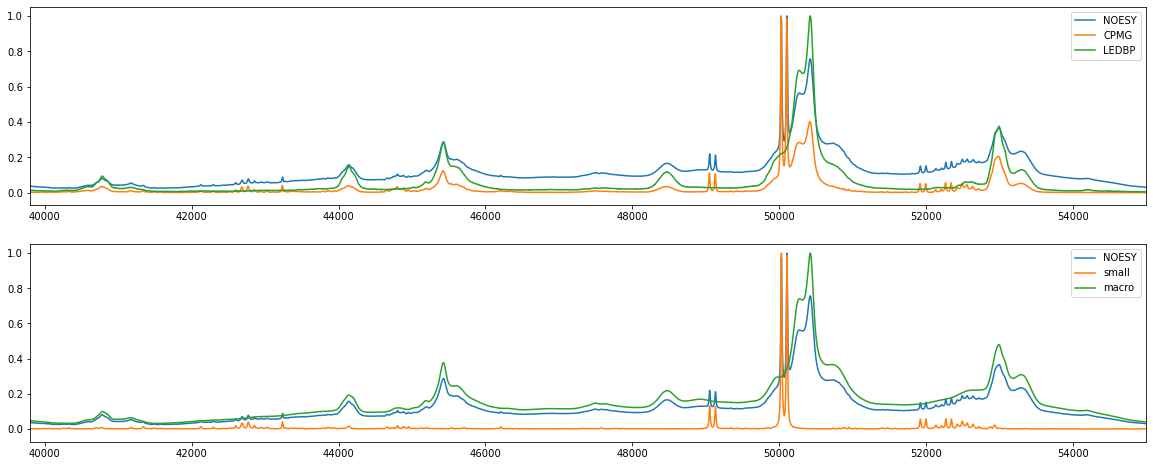

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8))
plt.subplot(2,1,1)
plt.plot(noesypr_nmr_clean[0], label = 'NOESY')
plt.plot(cpmgpr_nmr_clean[0], label = 'CPMG')
plt.plot(ledbp_nmr_clean[0], label = 'LEDBP')
plt.legend()
plt.xlim(39800,55000)
plt.subplot(2,1,2)
plt.plot(noesypr_DL_clean_for_bin[0], label = 'NOESY')
plt.plot(cpmgpr_DL_clean_for_bin[0], label = 'small')
plt.plot(ledbp_DL_clean_for_bin[0], label = 'macro')
plt.legend()
plt.xlim(39800,55000)
plt.show()

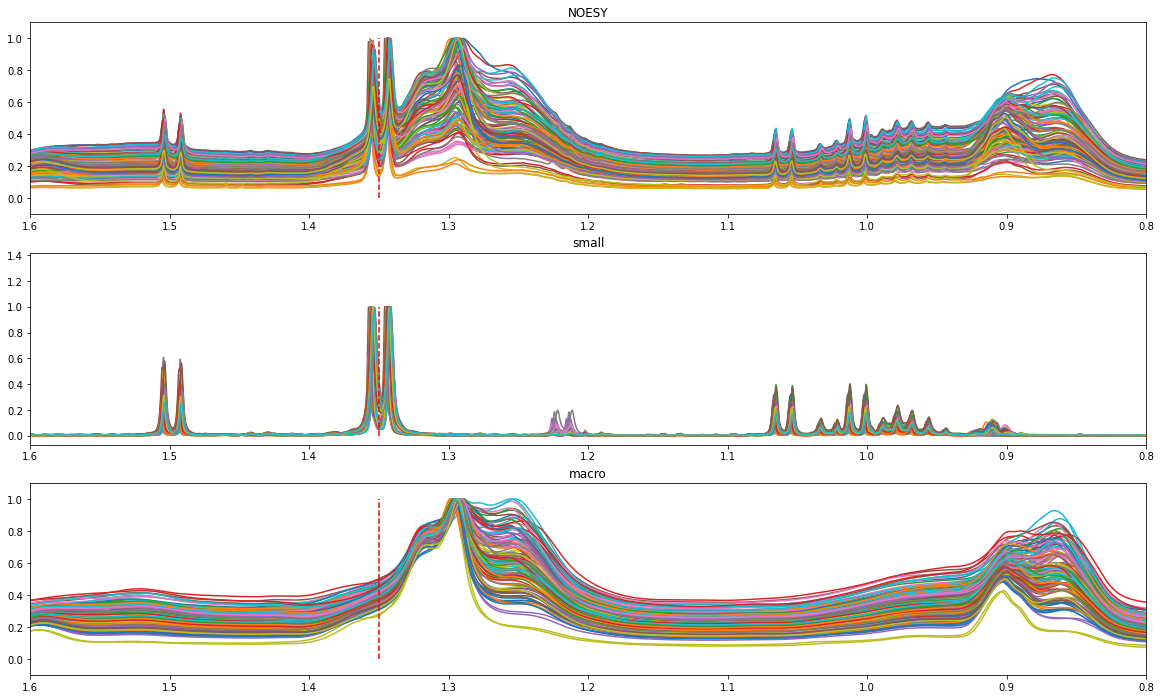

In [14]:
ppm_8p5 = np.linspace(9, 0.5, 55628) 
plt.figure(figsize=(20, 12))
plt.subplot(3,1,1)
plt.plot(ppm_8p5, noesypr_DL_clean_for_bin.T )
plt.vlines(1.35, 0, 1, colors = 'r', linestyles='--')
plt.ylim(-0.1,1.1)
plt.xlim(1.6, 0.8)
plt.title('NOESY')
plt.subplot(3,1,2)
plt.plot(ppm_8p5, cpmgpr_DL_clean_for_bin.T  )
plt.vlines(1.35, 0, 1, colors = 'r', linestyles='--')
plt.xlim(1.6, 0.8)
plt.title('small')
plt.subplot(3,1,3)
plt.plot(ppm_8p5, ledbp_DL_clean_for_bin.T  )
plt.vlines(1.35, 0, 1, colors = 'r', linestyles='--')
plt.ylim(-0.1,1.1)
plt.xlim(1.6, 0.8)
plt.title('macro')
plt.show()

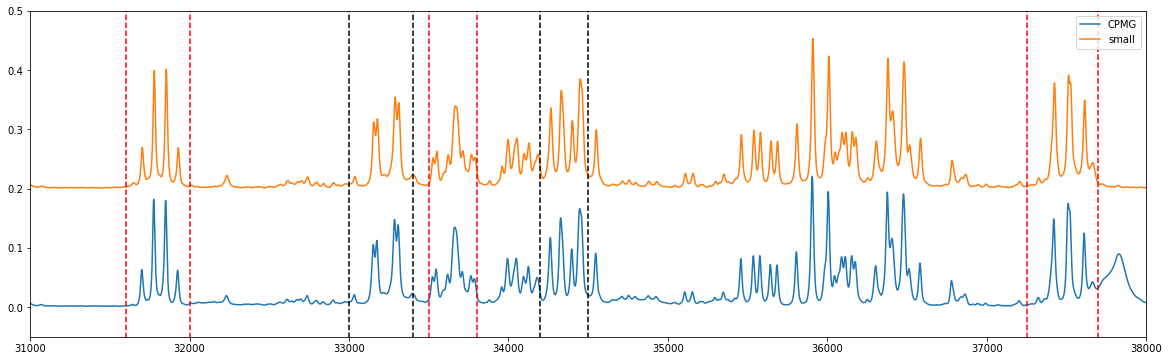

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))
plt.plot(cpmgpr_nmr_clean[0],label = 'CPMG')
plt.plot(cpmgpr_DL_clean_for_bin[0] +0.2,label = 'small' )
plt.vlines(31600, -0.1,1.1, colors='r',linestyles='--')
plt.vlines(32000, -0.1,1.1, colors='r',linestyles='--')
plt.vlines(33000, -0.1,1.1, colors='k',linestyles='--')
plt.vlines(33400, -0.1,1.1, colors='k',linestyles='--')
plt.vlines(33500, -0.1,1.1, colors='r',linestyles='--')
plt.vlines(33800, -0.1,1.1, colors='r',linestyles='--')
plt.vlines(34200, -0.1,1.1, colors='k',linestyles='--')
plt.vlines(34500, -0.1,1.1, colors='k',linestyles='--')
plt.vlines(37250, -0.1,1.1, colors='r',linestyles='--')
plt.vlines(37700, -0.1,1.1, colors='r',linestyles='--')
plt.ylim(-0.05, 0.5)
plt.xlim(31000, 38000)
plt.legend()
plt.show()

In [16]:
# cpmg_DL, cpmg_nmr   
cpmg_DL_1 = (cpmgpr_DL_clean_for_bin[:, 31600:32000]-cpmgpr_DL_clean_for_bin[:, 31600:32000].min(1).reshape(-1,1)).max(1) 
cpmg_nmr_1 = (cpmgpr_nmr_clean[:, 31600:32000]-cpmgpr_nmr_clean[:, 31600:32000].min(1).reshape(-1,1)).max(1)
facter = cpmg_DL_1/cpmg_nmr_1    # lactate
cpmg_DL_1.shape, cpmg_nmr_1.shape

((120,), (120,))

In [17]:
cpmg_DL = cpmgpr_DL_clean_for_bin
cpmg_nmr = cpmgpr_nmr_clean   

In [18]:
# cpmg_DL, cpmg_nmr  
cpmg_DL_1_2=(cpmg_DL[:, 33000:33400]-cpmg_DL[:, 33000:33400].min(1).reshape(-1,1)).max(1) 
cpmg_nmr_1_2=(cpmg_nmr[:,33000:33400]-cpmg_nmr[:,33000:33400].min(1).reshape(-1,1)).max(1)  
cpmg_DL_1_2.shape, cpmg_nmr_1_2.shape  

((120,), (120,))

R2:0.9955


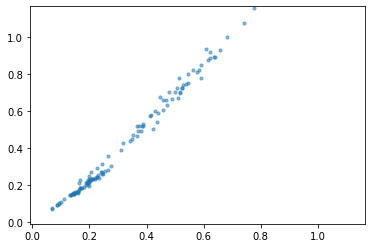

In [19]:
plt.scatter(cpmg_DL_1_2, cpmg_nmr_1_2*facter, s=10, alpha=0.5)
x = [0, 1]  
y = [0, 1]
plt.xlim(-1*cpmg_DL_1_2.max()*0.01, cpmg_DL_1_2.max()*1.5)
plt.ylim(-1*cpmg_DL_1_2.max()*0.01, cpmg_DL_1_2.max()*1.5)
correlation_coefficient_before = np.corrcoef(cpmg_DL_1_2, cpmg_nmr_1_2)[0, 1]
correlation_coefficient = np.corrcoef(cpmg_DL_1_2, cpmg_nmr_1_2*facter)[0, 1]
print("R2:{:.4f}".format(np.corrcoef(cpmg_DL_1_2, cpmg_nmr_1_2*facter)[0, 1]))
plt.show()

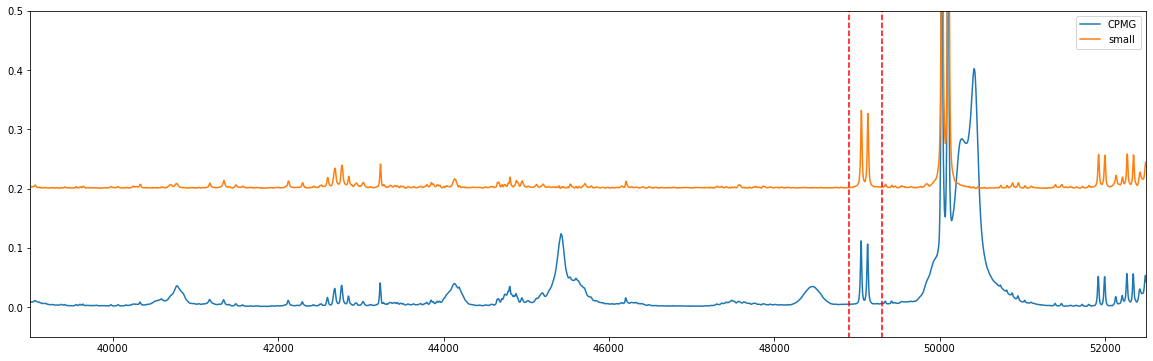

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))
plt.plot(cpmg_nmr[0],label = 'CPMG')
plt.plot(cpmg_DL[0] +0.2,label = 'small' )
plt.vlines(48900 , -0.1,1.1, colors='r',linestyles='--')
plt.vlines(49300, -0.1,1.1, colors='r',linestyles='--')
plt.ylim(-0.05, 0.5)
plt.xlim(39000, 52500)
plt.legend()
plt.show()

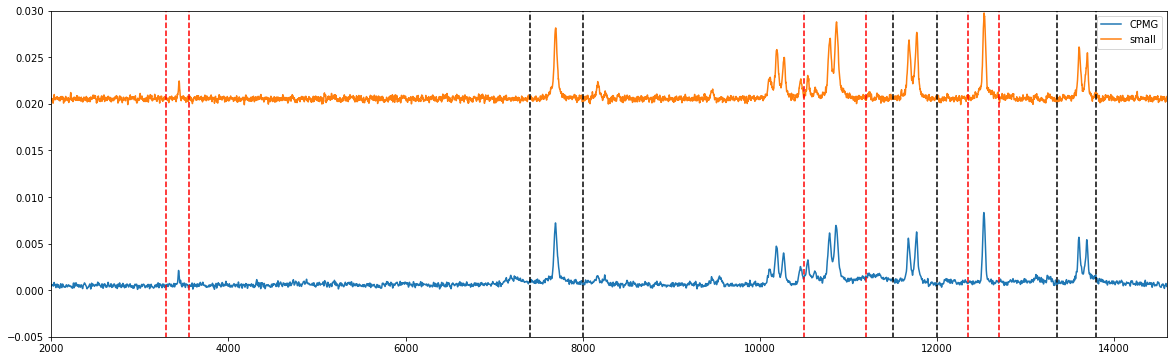

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))
plt.plot(cpmg_nmr[0], label = 'CPMG')
plt.plot(cpmg_DL[0] +0.02, label = 'small' )
plt.vlines(3300, -0.1,1.1, colors='r', linestyles='--')
plt.vlines(3550, -0.1,1.1, colors='r', linestyles='--')
plt.vlines(7400, -0.1,1.1, colors='k', linestyles='--')
plt.vlines(8000, -0.1,1.1, colors='k', linestyles='--')
plt.vlines(10500, -0.1,1.1, colors='r', linestyles='--')
plt.vlines(11200, -0.1,1.1, colors='r', linestyles='--')
plt.vlines(11500, -0.1,1.1, colors='k', linestyles='--')
plt.vlines(12000, -0.1,1.1, colors='k', linestyles='--')
plt.vlines(12350, -0.1,1.1, colors='r', linestyles='--')
plt.vlines(12700, -0.1,1.1, colors='r', linestyles='--')
plt.vlines(13350, -0.1,1.1, colors='k', linestyles='--')
plt.vlines(13800, -0.1,1.1, colors='k', linestyles='--')
plt.ylim(-0.005, 0.03)
plt.xlim(2000, 14600)
plt.legend()
plt.show()

In [22]:
def process_slice(data, start, end):
    if not data.size:
        raise ValueError("Input data is empty")
    slice_data = data[:, start:end]
    min_values = slice_data.min(1).reshape(-1, 1)
    return (slice_data - min_values).max(1)
slices = [(33000,33400), (33500,33800), (34200,34500), (37250,37700), (48900,49300),
    (3300,3550), (7400,8000), (11500,12000), (12350,12700), (13350,13800)]  

cpmg_DL_peak = []
cpmg_nmr_peak = []
for start, end in slices:
    try:
        cpmg_DL_part = process_slice(cpmg_DL, start, end)
        cpmg_nmr_part = process_slice(cpmg_nmr, start, end)
    except ValueError as e:
        print(f"Errors encountered while processing data：{e}")
        continue  
    cpmg_DL_peak.append(cpmg_DL_part)
    cpmg_nmr_peak.append(cpmg_nmr_part)

In [23]:
for i, j in zip(cpmg_DL_peak, cpmg_nmr_peak):
    m, b = np.polyfit(i, j*facter, 1)
    print("Linear equation: y = {:.2f}*x + {:.2f}".format(m, b))

Linear equation: y = 1.54*x + -0.07
Linear equation: y = 1.50*x + -0.06
Linear equation: y = 1.52*x + -0.08
Linear equation: y = 1.45*x + -0.09
Linear equation: y = 1.41*x + -0.06
Linear equation: y = 1.54*x + -0.00
Linear equation: y = 1.56*x + -0.00
Linear equation: y = 1.47*x + -0.00
Linear equation: y = 1.30*x + -0.00
Linear equation: y = 1.48*x + -0.00


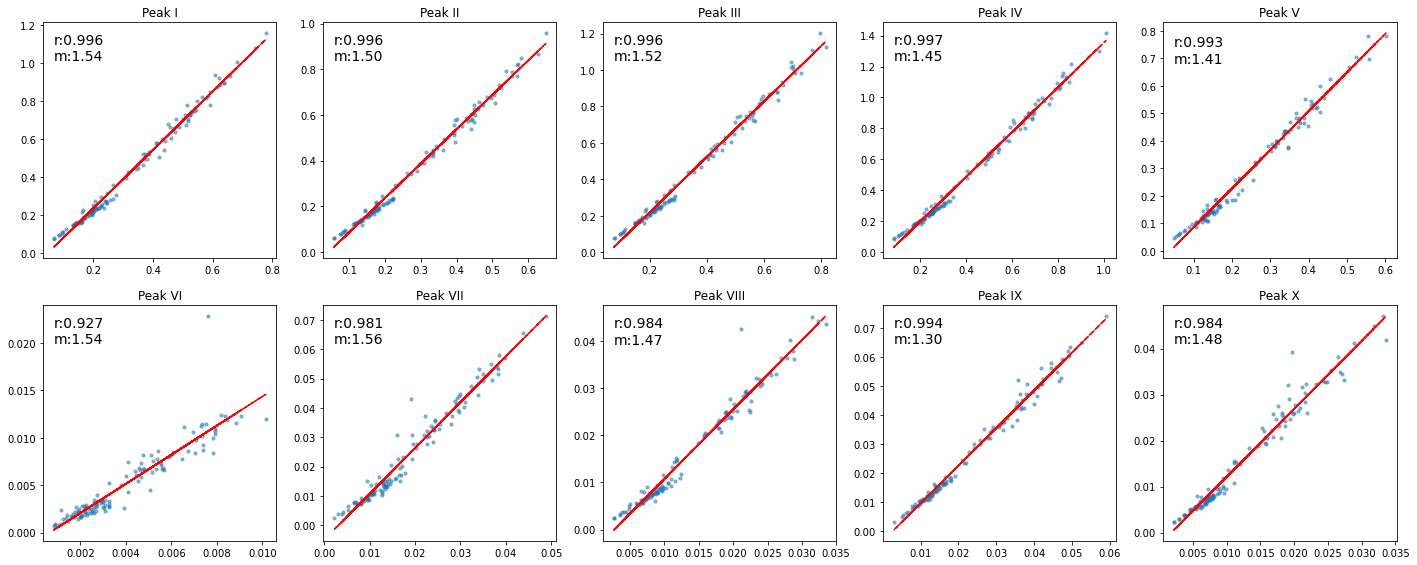

In [24]:
peak_list = ['I','II','III','IV','V','VI','VII','VIII','IX','X']
plt.figure(figsize=(20, 8))
for n, (i, j, p) in enumerate(zip(cpmg_DL_peak, cpmg_nmr_peak, peak_list), 1):
    m, b = np.polyfit(i, j*facter, 1)
    plt.subplot(2,5,n)
    plt.scatter(i, j*facter, s=10, alpha=0.5)
    plt.plot(i, m*i+b ,c = 'r', linestyle = '--')
    plt.title('Peak ' + p)
    plt.text(min(i), max(j*facter), 'r:{:.3f}\nm:{:.2f}'.format(np.corrcoef(i, j*facter)[0, 1], m), fontsize=14, ha='left', va='top')
plt.subplots_adjust(top=0.95,bottom=0.05,left=0.04 ,right=0.98,hspace=0.2 ,wspace=0.2)
plt.show()

### Perform PCA

In [25]:
def bin(data_for_bin, box = 20):
    '''bin function'''
    out_bin = []
    i = 0
    while data_for_bin.shape[1] > box*i:
        out_bin.append(np.sum(data_for_bin[:,i*box:(i+1)*box], 1)/data_for_bin[:,i*box:(i+1)*box].shape[1]) 
        i += 1
    return np.array(out_bin).T 
def norm_total(x):
    '''norm function'''
    return x/np.sum(x, 1).reshape(-1,1) 
def center(x):
    '''center function'''
    return x - np.mean(x, 0)

In [26]:
noesypr_bin_norm_center = center(norm_total(bin(noesypr_nmr_clean, box = 20)))
ledbp_nmr_bin_norm_center = center(norm_total(bin(ledbp_nmr_clean, box = 20)))
cpmgpr_nmr_bin_norm_center = center(norm_total(bin(cpmgpr_nmr_clean, box = 20)))

noesypr_DL_bin_norm_center = center(norm_total(bin(noesypr_DL_clean_for_bin)))
ledbp_DL_bin_norm_center = center(norm_total(bin(ledbp_DL_clean_for_bin)))
cpmgpr_DL_bin_norm_center = center(norm_total(bin(cpmgpr_DL_clean_for_bin)))

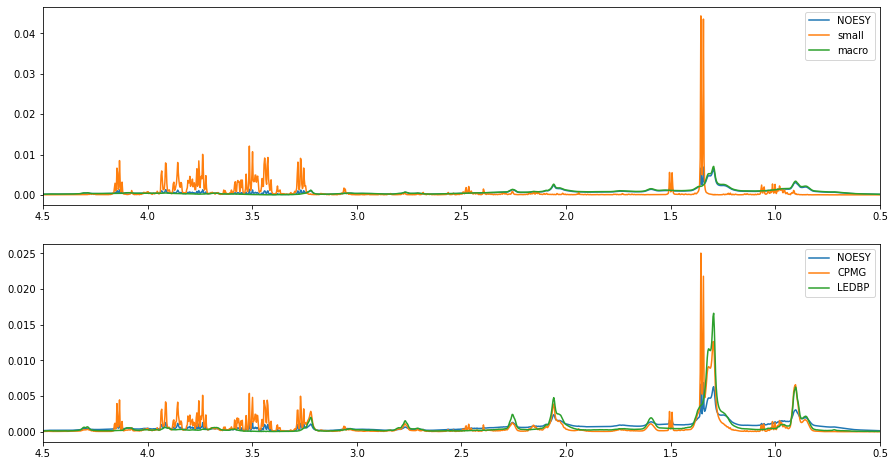

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8))
plt.subplot(2,1,1)
plt.plot(np.linspace(9 , 0.5, 2782), norm_total(bin(noesypr_DL_clean_for_bin, box = 20))[0], label = 'NOESY')
plt.plot(np.linspace(9 , 0.5, 2782), norm_total(bin(cpmgpr_DL_clean_for_bin, box = 20))[0], label = 'small')
plt.plot(np.linspace(9 , 0.5, 2782), norm_total(bin(ledbp_DL_clean_for_bin, box = 20))[0], label = 'macro')
plt.xlim(4.5 , 0.5)
plt.legend()
plt.subplot(2,1,2)
plt.plot(np.linspace(9 , 0.5, 2782), norm_total(bin(noesypr_nmr_clean, box = 20))[0], label = 'NOESY')
plt.plot(np.linspace(9 , 0.5, 2782), norm_total(bin(cpmgpr_nmr_clean, box = 20))[0], label = 'CPMG')
plt.plot(np.linspace(9 , 0.5, 2782), norm_total(bin(ledbp_nmr_clean, box = 20))[0], label = 'LEDBP')
plt.legend()
plt.xlim(4.5, 0.5)
plt.show()

In [28]:
from sklearn.decomposition import PCA
X_all = cpmgpr_DL_bin_norm_center*100
pca = PCA(n_components=3)
pca.fit(X_all)
explained_ratio = np.round(pca.explained_variance_ratio_, 4)
explained_ratio_sum = np.round(sum(pca.explained_variance_ratio_ ), 4)
print(explained_ratio, explained_ratio_sum) 

[0.593  0.2498 0.0646] 0.9074


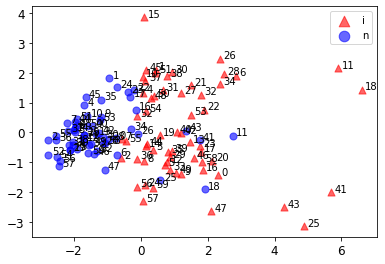

In [29]:
plt.figure(figsize=(6, 4))
plt.scatter(pca.transform(X_all)[:60,0], pca.transform(X_all)[:60,1],label = 'i',marker='^',c='r',s=50,alpha= 0.6, edgecolors='r')
n=np.arange(60)
for i,txt in enumerate(n):
    plt.annotate(txt,(pca.transform(X_all)[:60 ,0][i]+0.1,pca.transform(X_all)[:60 ,1][i]),fontsize=10)
plt.scatter(pca.transform(X_all)[60:,0],pca.transform(X_all)[60:,1],label = 'n',marker='o',c='b',s=50,alpha= 0.6,edgecolors='b') 
n=np.arange(60)
for i,txt in enumerate(n):
    plt.annotate(txt,(pca.transform(X_all)[60:,0][i]+0.1,pca.transform(X_all)[60:,1][i]),fontsize=10)
plt.legend(fontsize=10, markerscale=1.5, scatterpoints=1)
plt.tick_params(labelsize=12)
plt.subplots_adjust(top=0.9,bottom=0.1,left=0.1 ,right=0.9,hspace=0.2,wspace=0.2)
plt.show()

In [30]:
from sklearn.decomposition import PCA
X_all = noesypr_bin_norm_center*100
pca = PCA(n_components=3)
pca.fit(X_all)
explained_ratio = np.round(pca.explained_variance_ratio_, 4)
explained_ratio_sum = np.round(sum(pca.explained_variance_ratio_ ), 4)
print(explained_ratio, explained_ratio_sum) 

[0.5533 0.2354 0.0739] 0.8626


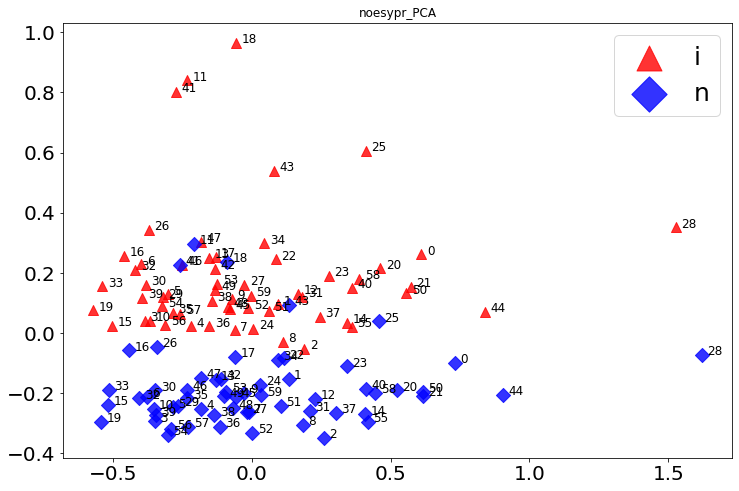

In [31]:
plt.figure(figsize=(12, 8))
plt.scatter(pca.transform(X_all)[:60,0], pca.transform(X_all)[:60,1],label='i',marker='^',c='r',s=100,alpha= 0.8)
n=np.arange(60)
for i,txt in enumerate(n):
    plt.annotate(txt,(pca.transform(X_all)[:60 ,0][i]+0.02,pca.transform(X_all)[:60 ,1][i]),fontsize=12)
plt.scatter(pca.transform(X_all)[60:,0], pca.transform(X_all)[60:,1],label='n',marker='D',c='b',s=100,alpha= 0.8)
n=np.arange(60)
for i,txt in enumerate(n):
    plt.annotate(txt,(pca.transform(X_all)[60:,0][i]+0.02,pca.transform(X_all)[60:,1][i]),fontsize=12)
plt.title('noesypr_PCA')
plt.legend(fontsize=25, markerscale=2.5, scatterpoints=1)
plt.tick_params(labelsize=20)
plt.show()

In [32]:
from sklearn.decomposition import PCA
X_all = ledbp_DL_bin_norm_center*100  
pca = PCA(n_components=3)
pca.fit(X_all)
explained_ratio = np.round(pca.explained_variance_ratio_, 4)
explained_ratio_sum = np.round(sum(pca.explained_variance_ratio_ ), 4)
print(explained_ratio, explained_ratio_sum) 

[0.8092 0.0922 0.0468] 0.9482


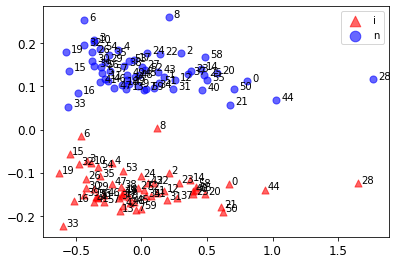

In [33]:
plt.figure(figsize=(6, 4))
plt.scatter(pca.transform(X_all)[:60,0],pca.transform(X_all)[:60,1],label = 'i',marker='^', c='r',s=50,alpha= 0.6,edgecolors ='r' )
n=np.arange(60)
for i,txt in enumerate(n):
    plt.annotate(txt,(pca.transform(X_all)[:60,0][i]+0.02,pca.transform(X_all)[:60 ,1][i]),fontsize=10)
plt.scatter(pca.transform(X_all)[60:,0], pca.transform(X_all)[60:,1],label='n',marker='o', c='b',s=50,alpha= 0.6, edgecolors ='b') 
n=np.arange(60)
for i,txt in enumerate(n):
    plt.annotate(txt,(pca.transform(X_all)[60: ,0][i]+0.04,pca.transform(X_all)[60: ,1][i]),fontsize=10)
plt.legend(fontsize=10, markerscale=1.5, scatterpoints=1)
plt.tick_params(labelsize=12)
plt.subplots_adjust(top=0.9,bottom=0.1,left=0.1 ,right=0.9,hspace=0.2,wspace=0.2)
plt.show()

In [34]:
from sklearn.decomposition import PCA
X_all = cpmgpr_nmr_bin_norm_center*100
pca = PCA(n_components=3)
pca.fit(X_all)
explained_ratio = np.round(pca.explained_variance_ratio_, 4)
explained_ratio_sum = np.round(sum(pca.explained_variance_ratio_ ), 4)
print(explained_ratio, explained_ratio_sum) 

[0.4343 0.2744 0.1876] 0.8964


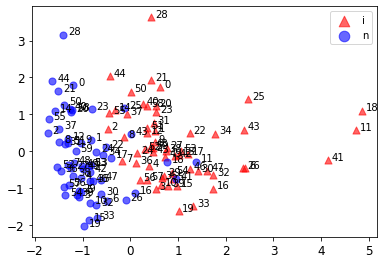

In [35]:
plt.figure(figsize=(6, 4))
plt.scatter(pca.transform(X_all)[:60,0], pca.transform(X_all)[:60,1],label='i',marker='^', c='r',s=50,alpha= 0.6,edgecolors ='r')
n=np.arange(60)
for i,txt in enumerate(n):
    plt.annotate(txt,(pca.transform(X_all)[:60 ,0][i]+0.08,pca.transform(X_all)[:60,1][i]),fontsize=10)
plt.scatter(pca.transform(X_all)[60:,0], pca.transform(X_all)[60:,1],label='n',marker='o',c='b',s=50,alpha= 0.6,edgecolors ='b') 
n=np.arange(60)
for i,txt in enumerate(n):
    plt.annotate(txt,(pca.transform(X_all)[60:,0][i]+0.10,pca.transform(X_all)[60:,1][i]),fontsize=10)
plt.legend(fontsize=10, markerscale=1.5 , scatterpoints=1)
plt.tick_params(labelsize=12)
plt.subplots_adjust(top=0.9,bottom=0.1,left=0.1 ,right=0.9,hspace=0.2,wspace=0.2)
plt.show()

In [36]:
from sklearn.decomposition import PCA
X_all = ledbp_nmr_bin_norm_center*100  
pca = PCA(n_components=3)
pca.fit(X_all)
explained_ratio = np.round(pca.explained_variance_ratio_, 4)
explained_ratio_sum = np.round(sum(pca.explained_variance_ratio_ ), 4)
print(explained_ratio, explained_ratio_sum) 

[0.8616 0.0451 0.0338] 0.9404


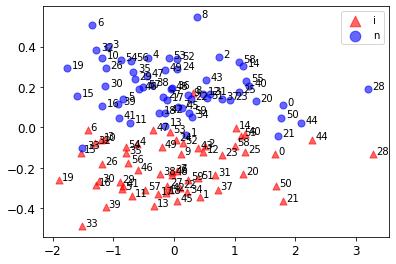

In [37]:
plt.figure(figsize=(6, 4))
plt.scatter(pca.transform(X_all)[:60,0],pca.transform(X_all)[:60,1],label='i',marker='^',c='r',s=50,alpha= 0.6,edgecolors ='r' )
n=np.arange(60)
for i,txt in enumerate(n):
    plt.annotate(txt,(pca.transform(X_all)[:60 ,0][i]+0.05,pca.transform(X_all)[:60 ,1][i]),fontsize=10)
plt.scatter(pca.transform(X_all)[60:,0], pca.transform(X_all)[60:,1],label='n',marker='o', c='b',s=50,alpha= 0.6,edgecolors ='b') 
n=np.arange(60)
for i,txt in enumerate(n):
    plt.annotate(txt,(pca.transform(X_all)[60: ,0][i]+0.08,pca.transform(X_all)[60: ,1][i]+0.0 ),fontsize=10)
plt.legend(fontsize=10, markerscale=1.5, scatterpoints=1)
plt.tick_params(labelsize=12)
plt.subplots_adjust(top=0.9,bottom=0.1,left=0.1 ,right=0.9,hspace=0.2,wspace=0.2)
plt.show()

### Pearson correlation coefﬁcients between the bin integrals and the distances

In [38]:
i_with_all_v = norm_total(bin(cpmgpr_nmr_clean, box = 20))[:60,: ]
no_i_with_all_v = norm_total(bin(cpmgpr_nmr_clean, box = 20))[60:,: ]
i_with_all_v.shape, no_i_with_all_v.shape

((60, 2782), (60, 2782))

In [39]:
# (i_with - no_i_with)
i_with_all_v = norm_total(bin(cpmgpr_nmr_clean, box = 20))[:60,: ]*100
no_i_with_all_v = norm_total(bin(cpmgpr_nmr_clean, box = 20))[60:,: ]*100

distance_60_all_v = np.sqrt(np.square(i_with_all_v - no_i_with_all_v).sum(1))
distance_60_all_v.shape, distance_60_all_v

((60,),
 array([2.00447632, 1.75695402, 1.52239758, 1.95973454, 1.57537377,
        2.13343211, 3.33998738, 1.36287662, 1.61138136, 2.21530201,
        1.78631028, 4.06376352, 1.92998175, 2.06541042, 1.52377477,
        3.20453692, 2.46631125, 2.30339117, 5.32511963, 2.21667749,
        2.04837244, 2.23794385, 1.94279835, 2.03273095, 2.45749048,
        2.89813849, 3.31760498, 2.38984852, 2.48267314, 2.31171372,
        2.54121431, 2.36264326, 2.93313812, 2.32665693, 2.57269309,
        2.16541109, 1.88724411, 1.71725455, 2.341956  , 2.19882114,
        1.61788667, 3.66686992, 1.97470466, 3.09391236, 1.25115207,
        1.7198233 , 2.33695499, 3.00167103, 1.83394766, 2.15164734,
        1.64307437, 1.85684045, 2.29917455, 2.03323887, 2.6567133 ,
        1.48944628, 2.07361413, 2.48892281, 1.83831582, 2.29343461]))

In [40]:
cor_list_all_v = []
for i in no_i_with_all_v.T:
    cor_list_all_v.append(np.corrcoef( i , distance_60_all_v)[0,1])
    
len(cor_list_all_v)

d:\anaconda3\envs\py310_torch\lib\site-packages\numpy\lib\function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
d:\anaconda3\envs\py310_torch\lib\site-packages\numpy\lib\function_base.py:2830: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


2782

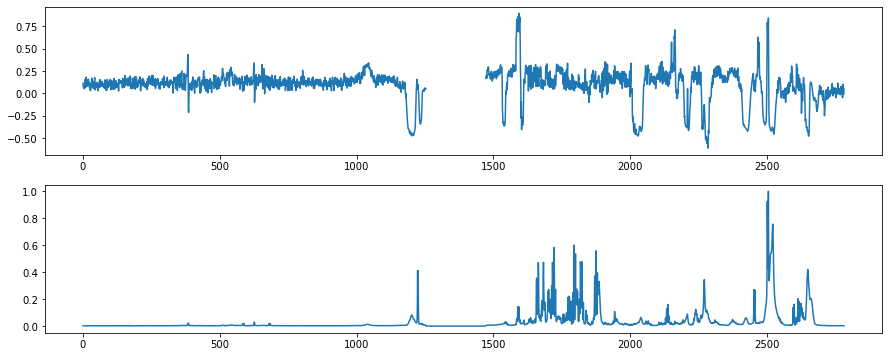

In [41]:
plt.figure(figsize=(15, 6))
plt.subplot(2,1,1)
plt.plot(cor_list_all_v)
plt.subplot(2, 1, 2)
plt.plot(no_i_with_all_v.sum(0)/no_i_with_all_v.sum(0).max())
plt.show()

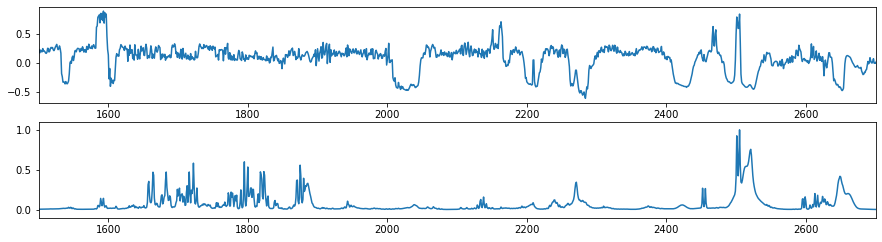

In [42]:
plt.figure(figsize=(15, 6))
plt.subplot(3,1,1)
plt.plot(cor_list_all_v)
plt.xlim(1500, 2700)
plt.subplot(3, 1, 2)
plt.plot(no_i_with_all_v.sum(0)/no_i_with_all_v.sum(0).max())
plt.xlim(1500, 2700)
plt.ylim(-0.1,1.1)
plt.show()

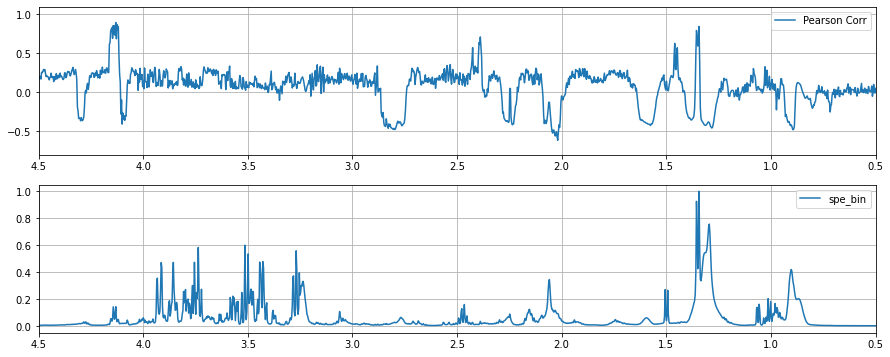

In [43]:
plt.figure(figsize=(15, 6))
ppm_8p5_2782 = np.linspace(9, 0.5, 2782)
plt.subplot(2, 1, 1)
plt.plot(ppm_8p5_2782, np.array(cor_list_all_v) , label = 'Pearson Corr')
plt.xlim(4.5, 0.5)
plt.ylim(-0.8, 1.1)
plt.grid()
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(ppm_8p5_2782, no_i_with_all_v.sum(0)/no_i_with_all_v.sum(0).max(), label = 'spe_bin')
plt.xlim(4.5, 0.5)
plt.grid()
plt.legend()
plt.show()     

In [44]:
new_cor_list_abs = np.abs(np.array(cor_list_all_v))

In [45]:
# (i_with - no_i_with)
i_with_all_v_DL = norm_total(bin(cpmgpr_DL_clean_for_bin, box = 20))[:60,: ] *100
no_i_with_all_v_DL = norm_total(bin(cpmgpr_DL_clean_for_bin, box = 20))[60:,: ] *100

distance_60_all_v_DL = np.sqrt(np.square(i_with_all_v_DL - no_i_with_all_v_DL).sum(1))
distance_60_all_v_DL.shape, distance_60_all_v_DL

((60,),
 array([3.38506599, 1.78523859, 2.40105354, 2.57024788, 1.93980598,
        2.88481174, 4.57089752, 1.8846764 , 2.4781448 , 3.17998214,
        2.28915875, 4.63053808, 2.79295456, 2.97784544, 2.39116442,
        4.72171135, 3.04131802, 3.06942983, 6.16133065, 2.95028285,
        3.48256404, 3.73554173, 2.45997555, 2.99825009, 3.61645554,
        4.80143128, 3.7325868 , 3.97918325, 4.27691471, 2.8212145 ,
        3.17441329, 3.46239905, 3.7332419 , 2.70722142, 3.2494328 ,
        2.78651916, 2.70044315, 2.95433382, 3.64363172, 3.21147729,
        2.60170917, 4.52390388, 2.56506722, 4.04962502, 2.37867933,
        2.12134812, 3.25143073, 3.82311457, 2.52389025, 2.89071071,
        2.38580854, 2.87809083, 3.59799142, 2.82189725, 3.59278172,
        2.38889609, 2.77886619, 3.08839395, 3.10527935, 2.5694437 ]))

In [46]:
cor_list_all_v_dl = []
for i in no_i_with_all_v_DL.T:
    cor_list_all_v_dl.append(np.corrcoef( i , distance_60_all_v_DL)[0,1])
    
len(cor_list_all_v_dl)

2782

In [47]:
new_cor_list_dl_abs = np.abs(cor_list_all_v_dl)

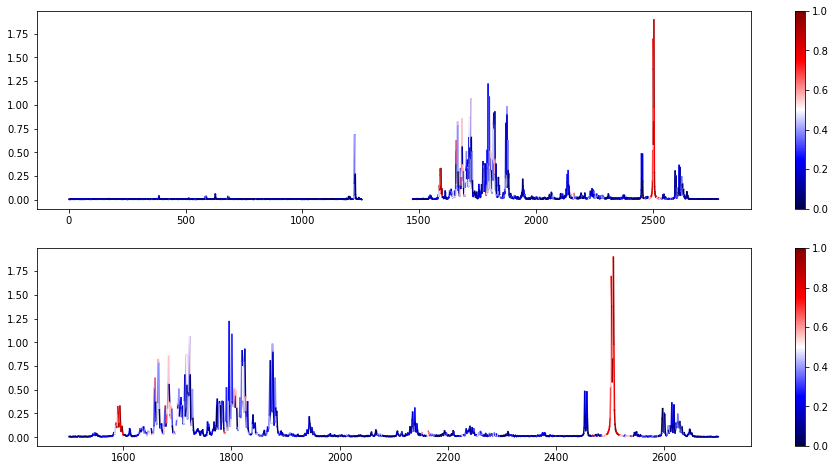

In [48]:
plt.figure(figsize=(16, 8))
plt.subplot(2, 1, 1)
cmap = plt.get_cmap("seismic")
norm = plt.Normalize(min(new_cor_list_dl_abs), max(new_cor_list_dl_abs)) #min(new_cor_list_abs),
for i in range(1, len(no_i_with_all_v_DL.mean(0))):
    plt.plot([i, i + 1], no_i_with_all_v_DL.mean(0)[i - 1: i + 1], color=cmap(norm((new_cor_list_dl_abs[i - 1]))))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap),ax=plt.gca())
plt.subplot(2, 1, 2)
cmap = plt.get_cmap("seismic")
norm = plt.Normalize(min(new_cor_list_dl_abs), max(new_cor_list_dl_abs)) #min(new_cor_list_abs),
for i in range(1500, 2700):
    plt.plot([i, i + 1], no_i_with_all_v_DL.mean(0)[i - 1: i + 1], color=cmap(norm((new_cor_list_dl_abs[i - 1]))))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap),ax=plt.gca())
plt.show()

In [49]:
ppm_8p5_bin = np.linspace(9,0.5,2782)
ppm_8p5_bin.shape  

(2782,)

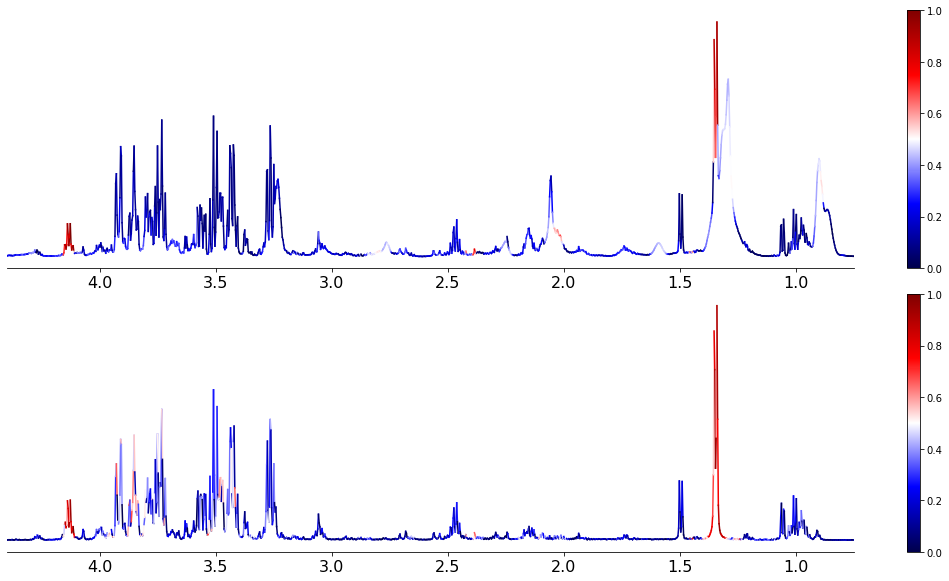

In [50]:
plt.figure(figsize=(15, 8))
plt.subplot(2, 1, 1)
cmap = plt.get_cmap("seismic")
norm = plt.Normalize(min(new_cor_list_abs), max(new_cor_list_abs))  
for i in range(1500, 2700):
    plt.plot([ppm_8p5_bin[i], ppm_8p5_bin[i + 1]], no_i_with_all_v.mean(0)[i - 1: i + 1], color=cmap(norm((new_cor_list_abs[i - 1]))))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.xlim(4.4, 0.75)
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap),ax=plt.gca())
ax = plt.gca()
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.yticks([])
plt.tick_params(labelsize=16)
plt.subplot(2, 1, 2)
cmap = plt.get_cmap("seismic")
norm = plt.Normalize(min(new_cor_list_dl_abs), max(new_cor_list_dl_abs))  
for i in range(1500, 2700):
    plt.plot([ppm_8p5_bin[i], ppm_8p5_bin[i + 1]], no_i_with_all_v_DL.mean(0)[i - 1: i + 1], color=cmap(norm((new_cor_list_dl_abs[i - 1])))) 
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap),ax=plt.gca())
plt.xlim(4.4, 0.75)
ax = plt.gca()
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.yticks([])
plt.subplots_adjust(top=0.99,bottom=0.05,left=0.01 ,right=0.99,hspace=0.1,wspace=0.2)
plt.tick_params(labelsize=16)
plt.show()
